In [64]:
using Pkg, Revise, VegaLite
Pkg.activate("../.")
using LightGraphs, GraphPlot, SimpleWeightedGraphs, LinearAlgebra, DataFrames, Random, Colors
using VegaGraphs

 Activating environment at `~/MEGAsync/EMAp/VegaGraphs/Project.toml`


In [65]:
Random.seed!(7)
df = DataFrame(rand([0,1],10,20));

In [76]:
VegaGraphs.graphplot(df,GraphPlot.circular_layout,tooltip=true,node_label=false)

LoadError: syntax: invalid identifier name "?"

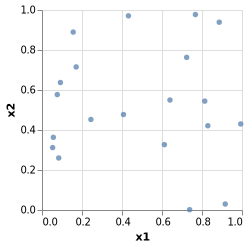

In [118]:
df = DataFrame(rand(20,3));
p  = @vlplot(data=df,layer=[{mark=:circle,x=:x1,y=:x2}])

In [119]:
p  = @vlplot(data=df,layer=[{mark=:circle,x=:x1,y=:x2}])
p.layer[1]["encoding"]["color"] = OrderedDict("field"=>"x3","type"=>"q")
p.layer[1]["encoding"]
p

OrderedDict{String,Any} with 3 entries:
  "x"     => OrderedDict{String,Any}("field"=>"x1")
  "y"     => OrderedDict{String,Any}("field"=>"x2")
  "color" => OrderedDict("field"=>"x3","type"=>"q")

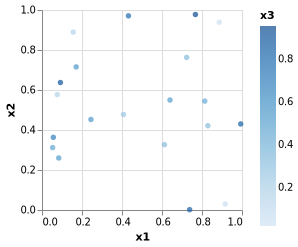